<a href="https://colab.research.google.com/github/karencfisher/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module1-exploratory-data-analysis/LS_DS_111_Exploratory_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

# first I looked at the raw data to see what we have (and cleared the output once I saw it. 
# 14 comma separated values, no headers) This is one of several datasets. Later, it would
# be interesting to concatenate a number of them into one perhaps. 
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data

*This one turned out to be more complex. The shape is as documented by UCI, but it lacked column headers and included many missing values (some '?', others zeros). I cleaned up it a lot so as to hopefully make some informative visualizations.* 

In [0]:
# Get column headers from data dictionary. I relabelled many of the columns to make them more easily explainable 
# from what level of domain knowledge I have some amount of (medicine).
# That makes it interesting to look at this dataset. I'd really like to check to correlations here!
col_headers = ['age', 'sex', 'chest_pain', 'rest_systol', 'cholestoral_level', 'fast_glucose', 'rest_ecg', 'max_rate', 'exercise_induced_angina',
               'ST_depression','slope','ca', 'thal', 'diagnosis']

#and load it up
import pandas as pd

heart_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
heart_df = pd.read_csv(heart_url, header=None, names=col_headers)

heart_df.head()


,age,sex,chest_pain,rest_systol,cholestoral_level,fast_glucose,rest_ecg,max_rate,exercise_induced_angina,ST_depression,slope,ca,thal,diagnosis
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [0]:
heart_df.tail()

,age,sex,chest_pain,rest_systol,cholestoral_level,fast_glucose,rest_ecg,max_rate,exercise_induced_angina,ST_depression,slope,ca,thal,diagnosis
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1
293,65,1,4,130,275,0,1,115,1,1.0,2,?,?,1


In [0]:
heart_df.shape

(294, 14)

In [0]:
heart_df.dtypes

age                          int64
sex                          int64
chest_pain                   int64
rest_systol                 object
cholestoral_level           object
fast_glucose                object
rest_ecg                    object
max_rate                    object
exercise_induced_angina     object
ST_depression              float64
slope                       object
ca                          object
thal                        object
diagnosis                    int64
dtype: object

In [0]:
heart_df.describe()

#this is misleading for many columns which, while numeric, are categorical. E.g., sex is male = 1, female = 0
#so statistics such as mean or std not very meaningful there.

,age,sex,chest_pain,ST_depression,diagnosis
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [0]:
# non numeric
heart_df.describe(exclude='number')

,rest_systol,cholestoral_level,fast_glucose,rest_ecg,max_rate,exercise_induced_angina,slope,ca,thal
count,294,294,294,294,294,294,294,294,294
unique,32,154,3,4,72,3,4,2,4
top,120,?,0,0,150,0,?,?,?
freq,65,23,266,235,29,204,190,291,266


In [0]:
#UCI reported missing data, which seems to be '?'. There are also a lot of zeros where there are numeric vlues
# even if as strings (Looking at raw data earlier, I noticed no leading to trailing spaces.)
#convert '?' to NaN
import numpy as np

heart_df = heart_df.replace('?', np.NaN)

#and see what we've got. I'm disappointed so many fasting glucose values are missing -- it'd be interesting to see how much blood sugar levels 
#may correlate with the diagnoses of heart disease.  
heart_df.isnull().sum()

age                          0
sex                          0
chest_pain                   0
rest_systol                  1
cholestoral_level           23
fast_glucose                 8
rest_ecg                     1
max_rate                     1
exercise_induced_angina      1
ST_depression                0
slope                      190
ca                         291
thal                       266
diagnosis                    0
dtype: int64

In [0]:
#I'm going to drop coulmns I lack domain knowledge for at the moment; beside, 'ca' is largely NaN (only five values)
heart_df.drop('ca', axis=1, inplace=True)
heart_df.drop('thal', axis=1, inplace=True)
heart_df.drop('slope', axis=1, inplace=True)

#Alas, fast_glucose actually has not useful data (supposed to be mg/dl, but seems to be either 0 or NaN)
#Sadly, cholestoral levels are all 0 too (should also be mg/dl values).
heart_df.drop('fast_glucose', axis=1, inplace=True)


heart_df.sample(5)

,age,sex,chest_pain,rest_systol,cholestoral_level,rest_ecg,max_rate,exercise_induced_angina,ST_depression,diagnosis
226,38,1,4,110,NaN,0,150,1,1.0,1
72,45,0,2,180,NaN,0,180,0,0.0,0
65,43,0,3,150,NaN,0,175,0,0.0,0
107,49,1,4,120,297,0,132,0,1.0,0
11,34,1,2,98,220,0,150,0,0.0,0


In [0]:
heart_df['cholestoral_level'].mode()

0    230
1    246
2    275
dtype: object

In [0]:
# replace NaNs in cholestoral with mode
heart_df['cholestoral_level'].fillna(heart_df['cholestoral_level'].mode())

#fix the remaining missing values (just drop those rows) and try recasting values again
heart_df.dropna(axis=0, inplace=True)

# I want diagnosis to be boolean, systolic pressure, cholestoral level, and max_rate to be numeric (int)
heart_df['diagnosis'] = heart_df['diagnosis'].apply(lambda x: bool(x))
heart_df['rest_systol'] = heart_df['rest_systol'].apply(lambda x: int(x))
heart_df['max_rate'] = heart_df['max_rate'].apply(lambda x: int(x))
heart_df['cholestoral_level'] = heart_df['cholestoral_level'].apply(lambda x: int(x))
heart_df.head()

,age,sex,chest_pain,rest_systol,cholestoral_level,rest_ecg,max_rate,exercise_induced_angina,ST_depression,diagnosis
0,28,1,2,130,132,2,185,0,0.0,False
1,29,1,2,120,243,0,160,0,0.0,False
3,30,0,1,170,237,1,170,0,0.0,False
4,31,0,2,100,219,1,150,0,0.0,False
5,32,0,2,105,198,0,165,0,0.0,False


In [0]:
# one more, let's make sex categorical, 'male' or 'female'
def make_sex_categorical(x):
  if x == 1:
    return 'male'
  else:
    return 'female'

heart_df['sex'] = heart_df['sex'].apply(make_sex_categorical)

In [0]:
# Also, change the numeric (but categorical) values of chest_pain to be descriptive, 
# by mapping
pain_types = {1: 'typical', 2: 'atypical', 3: 'non-angina', 4: 'asymptomatic'}
heart_df['chest_pain'] = heart_df['chest_pain'].map(pain_types)

In [0]:
heart_df.sample(5)

,age,sex,chest_pain,rest_systol,cholestoral_level,rest_ecg,max_rate,exercise_induced_angina,ST_depression,diagnosis
138,53,male,asymptomatic,130,182,0,148,0,0.0,False
233,48,male,asymptomatic,122,275,1,150,1,2.0,True
197,40,male,asymptomatic,120,466,0,152,1,1.0,True
76,45,male,asymptomatic,120,225,0,140,0,0.0,False
84,46,male,asymptomatic,180,280,1,120,0,0.0,False


In [0]:
heart_df.shape

(269, 10)

In [0]:
heart_df.dtypes

age                          int64
sex                         object
chest_pain                  object
rest_systol                  int64
cholestoral_level            int64
rest_ecg                    object
max_rate                     int64
exercise_induced_angina     object
ST_depression              float64
diagnosis                     bool
dtype: object

In [0]:
heart_df.isnull().sum()

age                        0
sex                        0
chest_pain                 0
rest_systol                0
cholestoral_level          0
rest_ecg                   0
max_rate                   0
exercise_induced_angina    0
ST_depression              0
diagnosis                  0
dtype: int64

In [0]:
# That's more what I want it to be. This way I can maybe make some nice visualizations:) I 
# have left a couple of columns as are since I don't plan to use them at the moment.

## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


*This time, the "Student Performance" dataset, or rather one of the two (the math one, student-mat.csv). Downloaded to my machine, then uploaded to Colab. It is far more complete than the previous dataset. A piece of cake by comparison! Came with headers, no missing values, properly formatted. Separator though was semi-colon rather than comma, so I had to use the sep parameter loading it into Pandas.*


In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed
student_df = pd.read_csv('student-mat.csv', sep=';')
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [0]:
student_df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


In [0]:
student_df.shape

(395, 33)

In [0]:
student_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [0]:
student_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [0]:
student_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [0]:
student_df.describe(exclude='number')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [0]:
heart_df.head(3)

,age,sex,chest_pain,rest_systol,cholestoral_level,rest_ecg,max_rate,exercise_induced_angina,ST_depression,diagnosis
0,28,male,atypical,130,132,2,185,0,0.0,False
1,29,male,atypical,120,243,0,160,0,0.0,False
3,30,female,typical,170,237,1,170,0,0.0,False


In [0]:
# On the heart disease dataset, looking at sex and diagnosis. Is one sex more likely to have a positive
#diagnosis, or are they more or less the same?

sex_diagnose = pd.crosstab(heart_df['sex'], heart_df['diagnosis'])
sex_diagnose

diagnosis,False,True
sex,,
female,61,12
male,108,88


In [0]:
# chest pain and diagnosis
pain_diagnose = pd.crosstab(heart_df['chest_pain'], heart_df['diagnosis'])
pain_diagnose

diagnosis,False,True
chest_pain,,
asymptomatic,38,78
atypical,87,8
non-angina,37,11
typical,7,3


In [0]:
ecg_diagnose = pd.crosstab(heart_df['rest_ecg'], heart_df['diagnosis'])
ecg_diagnose

diagnosis,False,True
rest_ecg,,
0,134,80
1,30,19
2,5,1


In [0]:
# from the UCI data dictionary, the codes for rest_ecg are:
# -- Value 0: normal
# -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

In [0]:
student_df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10


In [0]:
pstatus_schoolsup = pd.crosstab(student_df['Pstatus'], student_df['schoolsup'])
pstatus_schoolsup

schoolsup,no,yes
Pstatus,,
A,34,7
T,310,44


In [0]:
motherjob_schoolsup = pd.crosstab(student_df['Mjob'], student_df['schoolsup'])
motherjob_schoolsup

schoolsup,no,yes
Mjob,,
at_home,50,9
health,32,2
other,120,21
services,87,16
teacher,55,3


In [0]:
fatherjob_schoolsup = pd.crosstab(student_df['Fjob'], student_df['schoolsup'])
fatherjob_schoolsup

schoolsup,no,yes
Fjob,,
at_home,17,3
health,13,5
other,192,25
services,99,12
teacher,23,6


In [0]:
# So one or other parent being at home doesn't improve the student's support with school?

## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

In [0]:
student_df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10


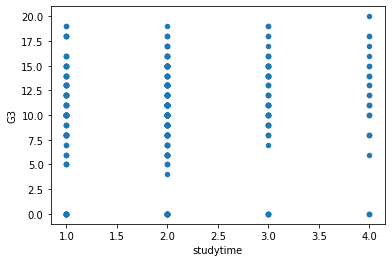

In [0]:
student_df.plot.scatter('studytime', 'G3');

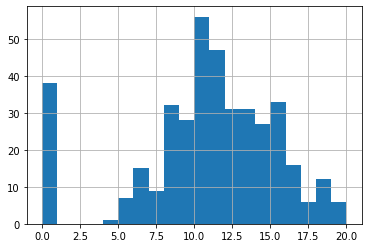

In [0]:
# student final grades
student_df['G3'].hist(bins=20);


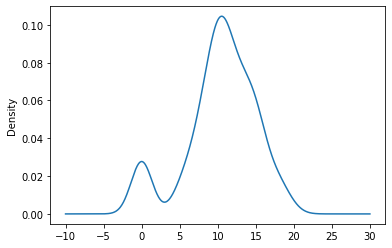

In [0]:
student_df['G3'].plot.density();

In [0]:
# I'd expect more or less a normal distibution, but that spike at 0 makes me wonder if there are some missing grades included as '0'.
#(But then again, it's math -- maybe 40% more or less did flunk.)


In [0]:
heart_df.head(3)

,age,sex,chest_pain,rest_systol,cholestoral_level,rest_ecg,max_rate,exercise_induced_angina,ST_depression,diagnosis
0,28,male,atypical,130,132,2,185,0,0.0,False
1,29,male,atypical,120,243,0,160,0,0.0,False
3,30,female,typical,170,237,1,170,0,0.0,False


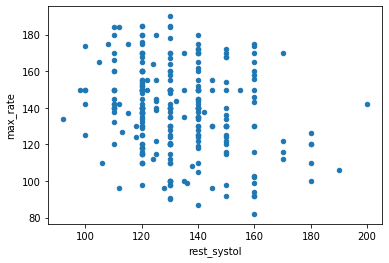

In [0]:
heart_df.plot.scatter('rest_systol', 'max_rate');

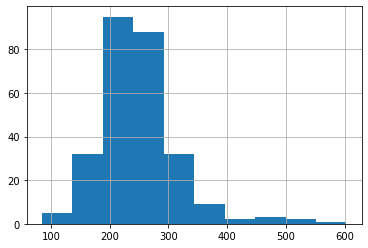

In [0]:
heart_df['cholestoral_level'].hist();

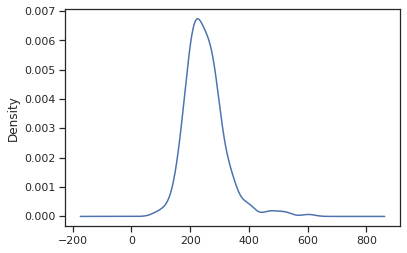

In [0]:
heart_df['cholestoral_level'].plot.density();

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


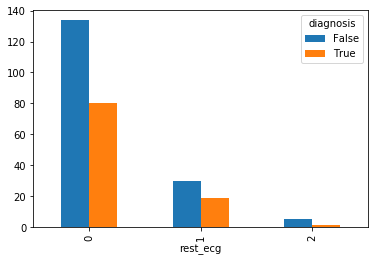

In [0]:
ecg_diagnose.plot(kind='bar');

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

*Here is a dataset of mine; it is a record of blood glucose levels, some before, some after meals Some also have annotations. Values are mg/dl. I kept track for my doctor for a while. And, I am doing fine, thank you. I have wondered what the distribution of the values would be, either before, or after* 

In [0]:
glucose_df = pd.read_csv('dataCopy.csv', encoding='iso-8859-1')
glucose_df.sample(20)

,Date and Time,Value,Additional Value,Notes,Unnamed: 4
80,01/07/19 07:35 AM,70,Before Meal,NaN,NaN
205,09/07/18 11:30 AM,101,After Meal,<30g 2.5 hours,2.23 mile walk
67,01/19/19 07:45 AM,79,Before Meal,NaN,NaN
107,11/27/18 07:39 AM,78,Before Meal,NaN,NaN
253,07/22/18 05:50 AM,98,Before Meal,NaN,NaN
139,10/25/18 05:20 PM,100,After Meal,"Sweet/sour chicken ato Bangkok House, salad, s...",NaN
254,07/21/18 10:08 AM,115,After Meal,NaN,NaN
36,03/10/19 08:30 AM,79,Before Meal,NaN,NaN
30,03/25/19 08:10 AM,95,Before Meal,NaN,NaN
51,02/15/19 08:14 AM,75,Before Meal,NaN,NaN


In [0]:
glucose_df.shape

(263, 5)

In [0]:
glucose_df.describe()

,Value
count,263.000000
mean,95.745247
std,20.572524
min,66.000000
25%,83.000000
50%,91.000000
75%,102.000000
max,192.000000


Mean = 87.68 Median = 87.00


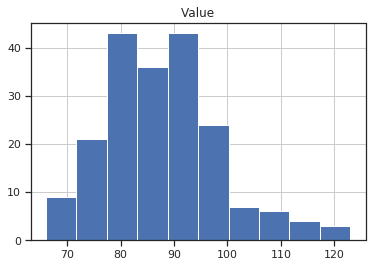

In [0]:
before = glucose_df['Additional Value'] == 'Before Meal'
after = glucose_df['Additional Value'] == 'After Meal'

print('Mean = %.2f Median = %.2f' % (glucose_df[before]['Value'].mean(), glucose_df[before]['Value'].median()))
glucose_df[before].hist();

Mean = 119.34 Median = 116.00


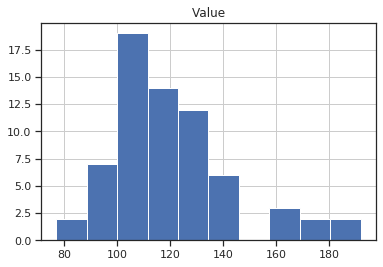

In [0]:
print('Mean = %.2f Median = %.2f' % (glucose_df[after]['Value'].mean(), glucose_df[after]['Value'].median()))
glucose_df[after].hist();

*Somewhat normal, but distinctly positively skewed. That is interesting! *

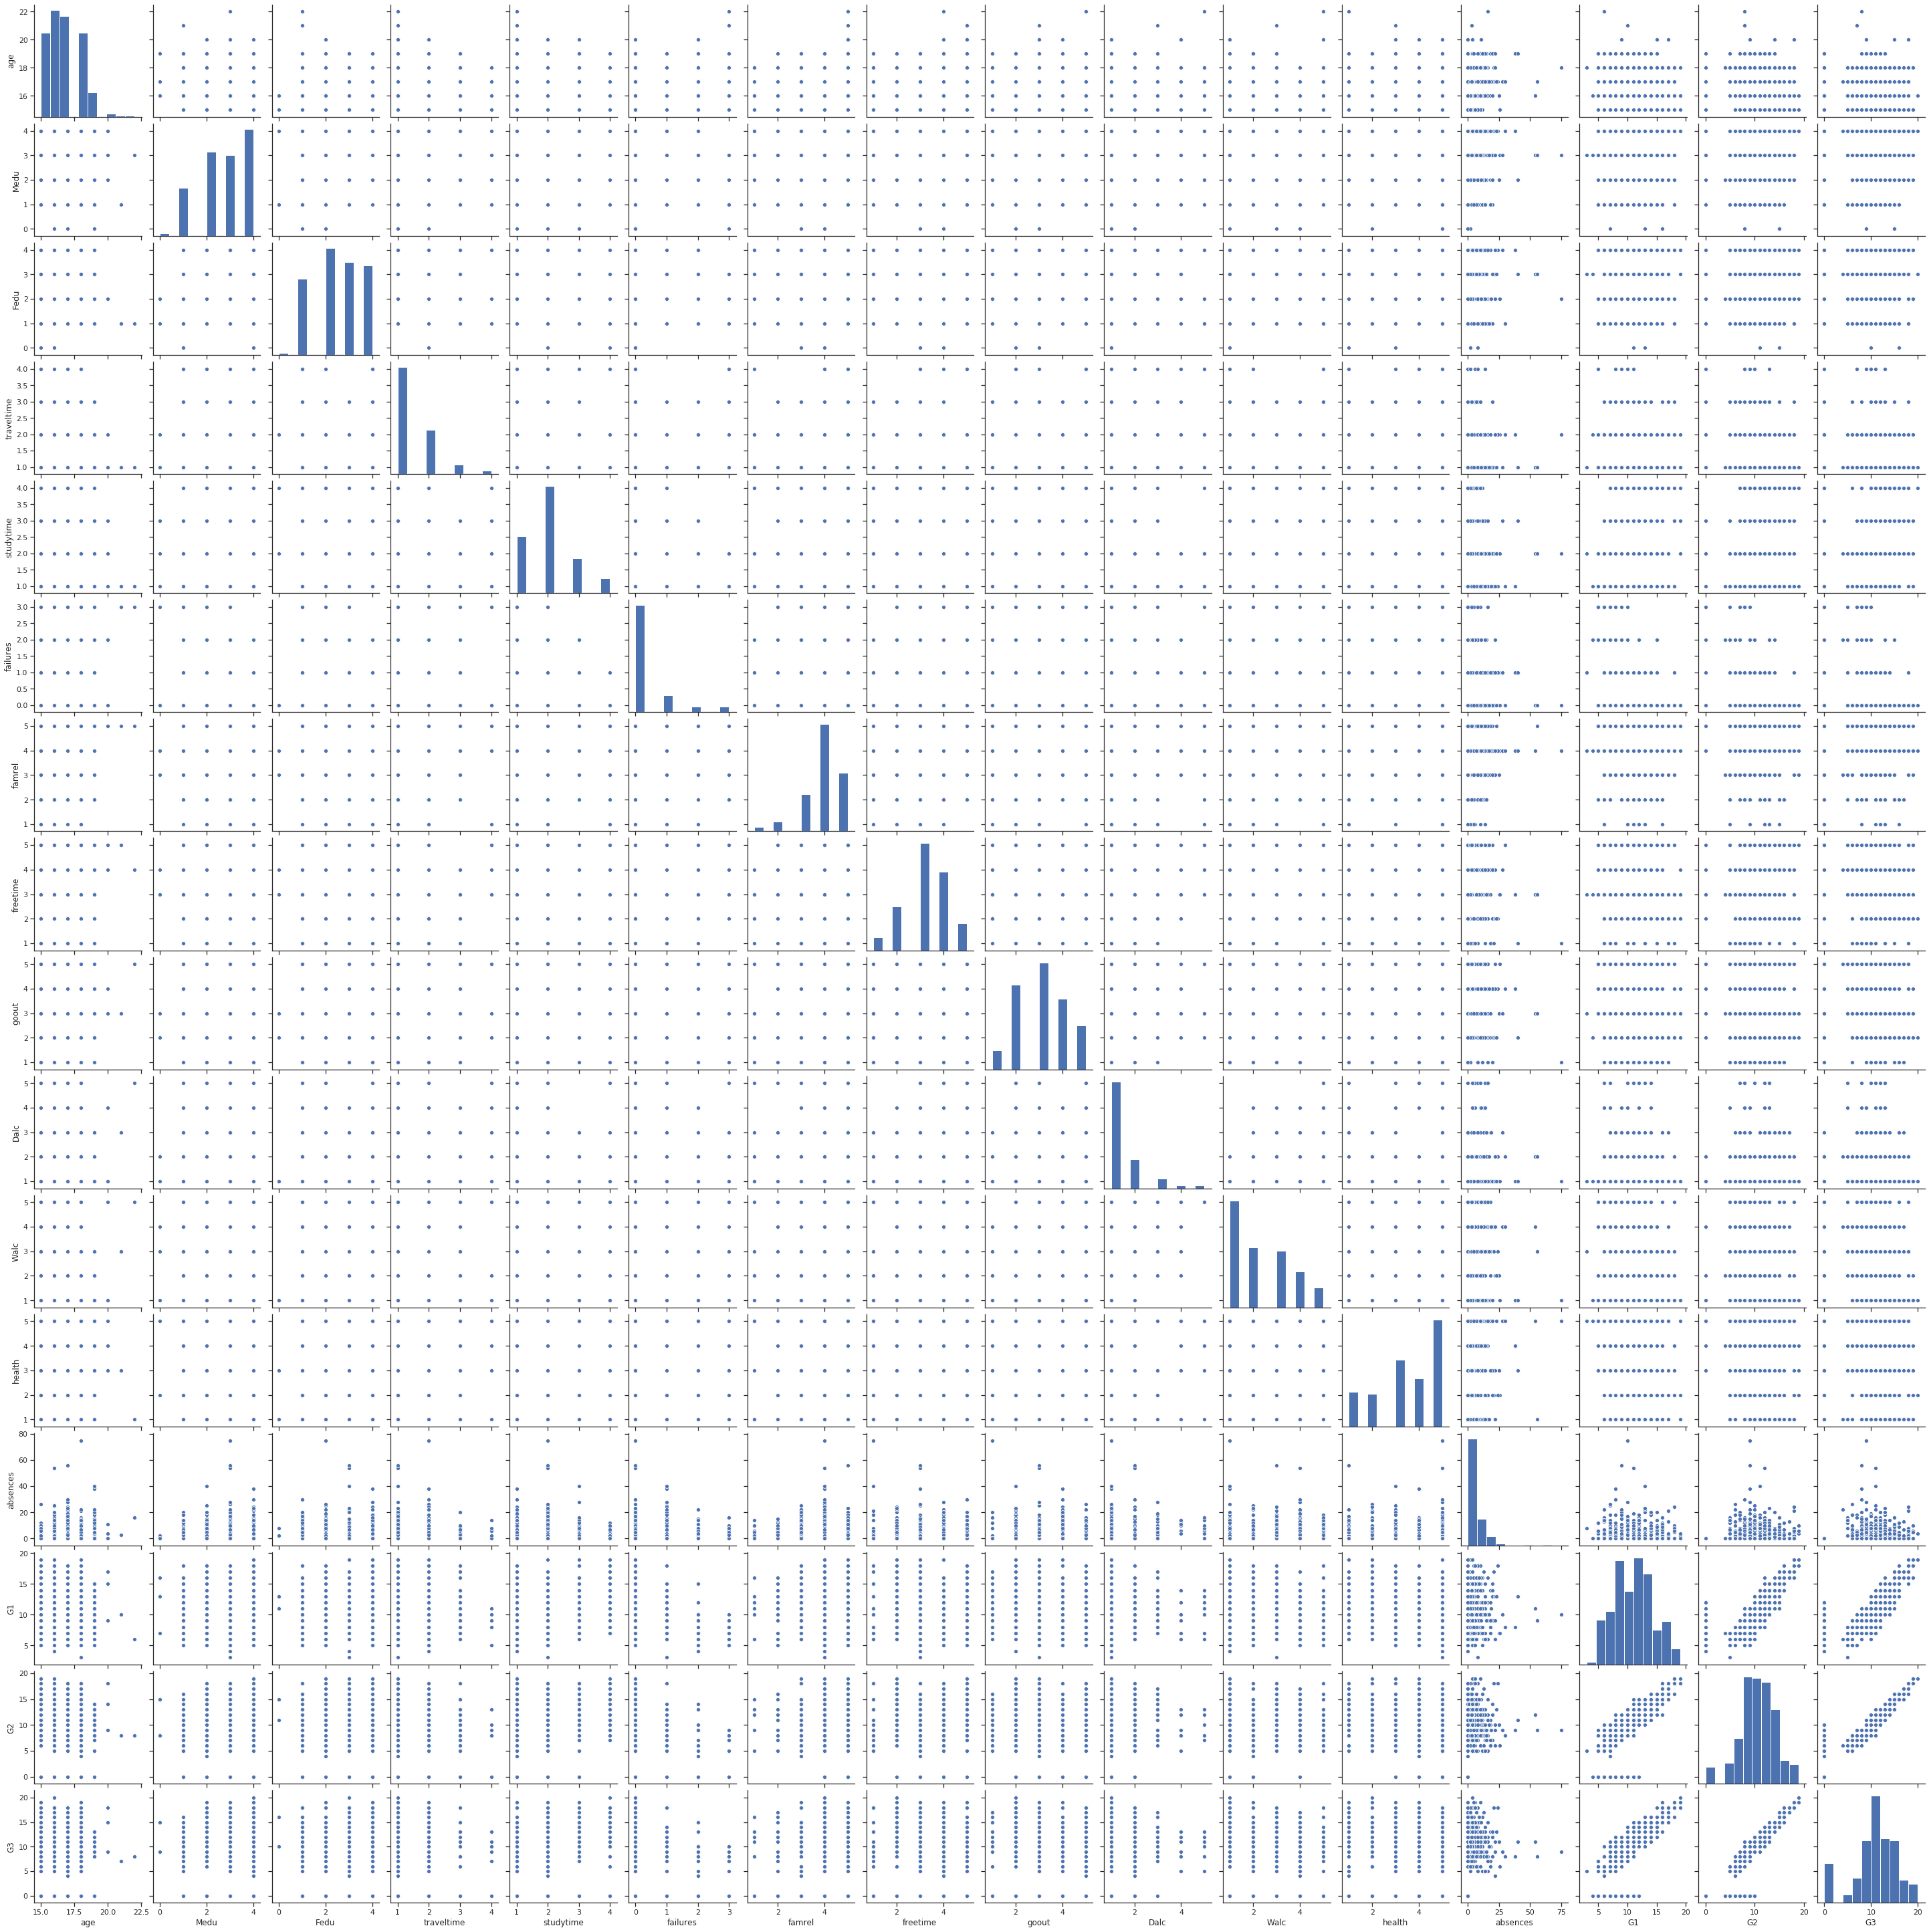

In [0]:
# trying this with the student performance dataset
import seaborn as sns
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(student_df)
